In [267]:
import pandas as pd
import json
import os
import requests
from datetime import datetime, timezone
import matplotlib as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import statsmodels.api as sms
from tensorflow.keras.layers import Dropout

In [268]:
!pip install pmdarima


In [269]:
url = "https://merolagani.com/handlers/TechnicalChartHandler.ashx?type=get_advanced_chart&symbol=ALICL&resolution=1D&rangeStartDate=1642671489&rangeEndDate=1768729873&from=&isAdjust=1&currencyCode=NPR"
response = requests.get(url)
data = response.json()


with open("ALICL.json", "w") as f:
    json.dump(data, f)

In [270]:
companies = ["/content/ALICL.json"]

for symbol in companies:
    with open(f"{symbol}", 'r') as f:
        data = json.load(f)
        print(data)
    dates = [datetime.fromtimestamp(ts, tz=timezone.utc).strftime('%Y-%m-%d') for ts in data['t']]
    df=pd.DataFrame({
    "Date":dates,
    "Open":data['o'],
    "Close":data['c'],
    "High":data['h'],
    "Low":data['l'],
    "Volume":data['v']

})
    csv_filename = os.path.basename(symbol).replace('.json', '.csv')
    print(csv_filename)
    df.to_csv(csv_filename,index=False)
    print(f"{csv_filename}created")

{'t': [1642711500, 1642970700, 1643057100, 1643143500, 1643229900, 1643316300, 1643575500, 1643661900, 1643748300, 1643921100, 1644180300, 1644266700, 1644353100, 1644439500, 1644525900, 1644785100, 1644871500, 1644957900, 1645044300, 1645130700, 1645389900, 1645476300, 1645562700, 1645649100, 1645735500, 1645994700, 1646081100, 1646253900, 1646599500, 1646685900, 1646858700, 1646945100, 1647204300, 1647290700, 1647377100, 1647463500, 1647809100, 1647895500, 1647981900, 1648068300, 1648154700, 1648413900, 1648500300, 1648586700, 1648673100, 1648759500, 1649018700, 1649105100, 1649191500, 1649277900, 1649364300, 1649709900, 1649796300, 1649882700, 1650228300, 1650314700, 1650401100, 1650487500, 1650573900, 1650833100, 1650919500, 1651005900, 1651092300, 1651178700, 1651524300, 1651697100, 1651783500, 1652042700, 1652129100, 1652215500, 1652301900, 1652388300, 1652820300, 1652906700, 1652993100, 1653079500, 1653338700, 1653425100, 1653511500, 1653597900, 1653684300, 1653943500, 165402990

In [271]:
df = pd.read_csv("ALICL.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
print(len(df))

925


In [272]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2022-01-20,568.91,573.37,577.03,559.60,37239.0
2022-01-23,581.09,572.96,586.78,572.68,72785.0
2022-01-24,575.00,558.75,575.00,554.69,66929.0
2022-01-25,568.91,565.65,577.03,560.73,202758.0
2022-01-26,576.37,547.06,586.68,546.56,44829.0


In [273]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2026-01-08,465.0,471.9,471.9,462.5,50286.0
2026-01-12,472.9,472.0,476.7,469.5,40918.0
2026-01-13,472.0,476.0,481.0,472.0,70183.0
2026-01-14,482.0,473.7,485.0,473.6,87084.0
2026-01-18,474.9,480.7,481.9,474.9,54787.0


In [274]:
type(df)

pandas.core.frame.DataFrame

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 925 entries, 2022-01-20 to 2026-01-18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    925 non-null    float64
 1   Close   925 non-null    float64
 2   High    925 non-null    float64
 3   Low     925 non-null    float64
 4   Volume  925 non-null    float64
dtypes: float64(5)
memory usage: 43.4 KB


<Axes: xlabel='Date'>

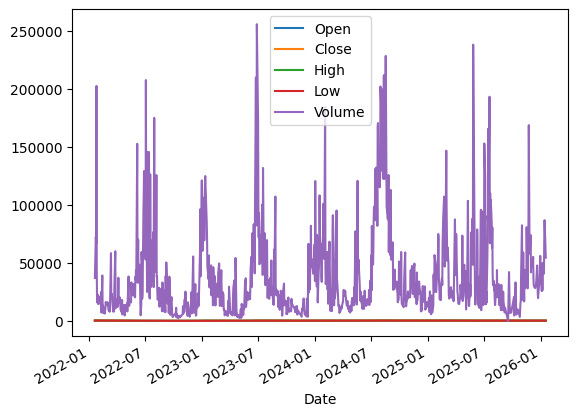

In [276]:
df.plot()

In [277]:
def plot_graph(figsize, df_to_plot, column_name):

    plt.figure(figsize=figsize)
    plt.plot(df_to_plot.index, df_to_plot[column_name], label=column_name)
    plt.title(f"ALICL {column_name} Over Time")
    plt.xlabel("Date")
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

In [278]:
type(df['Close'])

pandas.core.series.Series

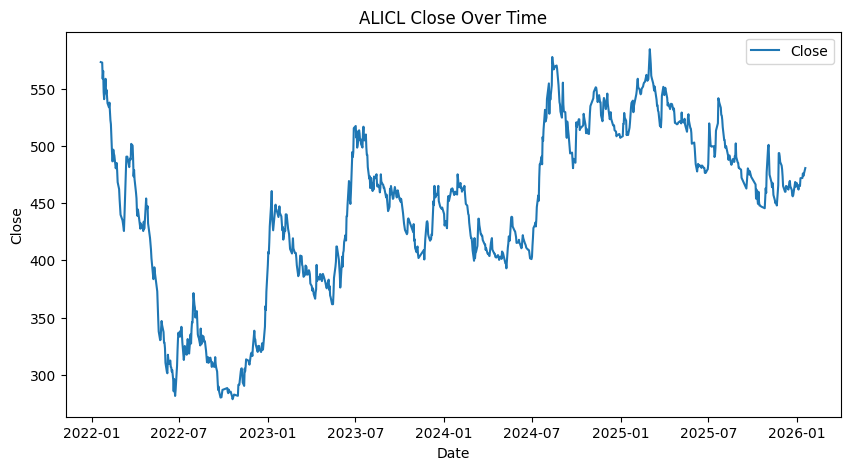

In [279]:
import matplotlib.pyplot as plt
plot_graph((10, 5), df, "Close")


In [280]:
from statsmodels.tsa.stattools import adfuller

In [281]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('The series is stationary.')
    else:
        print('The series is not stationary.')

In [282]:
adf_test(df['Close'])

ADF Statistic: -2.1704683747822693
p-value: 0.21713775158139254
The series is not stationary.


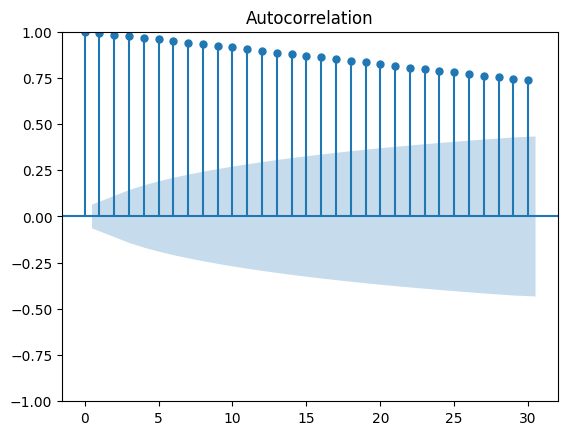

In [283]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(df['Close'])

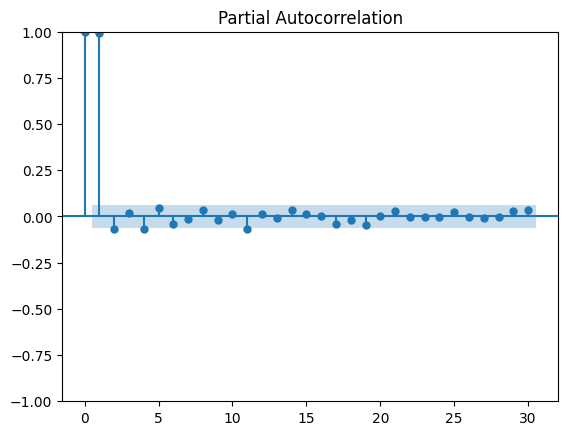

In [284]:
pacf = plot_pacf(df['Close'])

In [285]:
#using differencing
df['Close_first_difference'] = df['Close']-df['Close'].shift(1)

In [286]:
df.head()

,Open,Close,High,Low,Volume,Close_first_difference
Date,,,,,,
2022-01-20,568.91,573.37,577.03,559.60,37239.0,NaN
2022-01-23,581.09,572.96,586.78,572.68,72785.0,-0.41
2022-01-24,575.00,558.75,575.00,554.69,66929.0,-14.21
2022-01-25,568.91,565.65,577.03,560.73,202758.0,6.90
2022-01-26,576.37,547.06,586.68,546.56,44829.0,-18.59


In [287]:
data=df['Close_first_difference'].dropna()
adf_test(data)

ADF Statistic: -27.789834238697125
p-value: 0.0
The series is stationary.


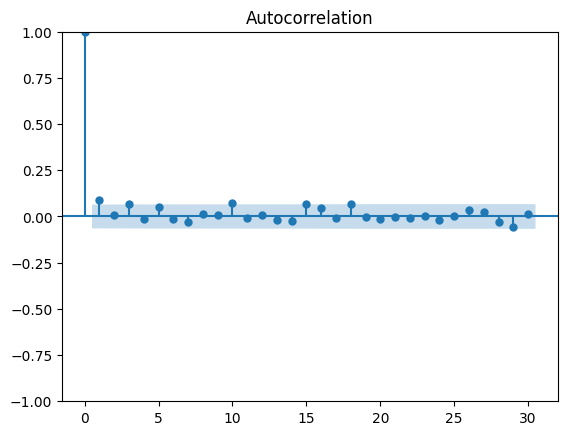

In [288]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data)

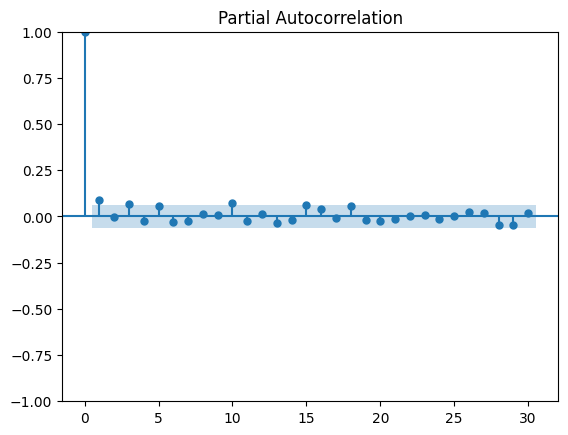

In [289]:
result = plot_pacf(data)

In [290]:
to_row=int(len(df)*0.8)
training_data = list(df['Close'].iloc[0:to_row])
testing_data  = list(df['Close'].iloc[to_row:])


In [291]:
testing_data

[517.63,
 522.23,
 516.36,
 523.55,
 543.78,
 551.73,
 544.52,
 546.89,
 550.89,
 541.99,
 535.41,
 537.38,
 536.31,
 532.29,
 536.98,
 536.05,
 536.51,
 531.28,
 532.85,
 527.24,
 520.18,
 520.27,
 519.0,
 519.11,
 519.54,
 520.57,
 521.85,
 520.64,
 519.77,
 529.28,
 521.69,
 520.5,
 523.78,
 518.87,
 517.16,
 512.46,
 512.46,
 517.08,
 525.04,
 527.77,
 522.2,
 515.54,
 515.26,
 511.44,
 502.0,
 503.02,
 498.11,
 491.11,
 484.25,
 477.75,
 481.6,
 484.35,
 481.9,
 483.21,
 482.63,
 482.61,
 480.86,
 482.94,
 482.51,
 480.85,
 480.72,
 476.5,
 477.5,
 476.63,
 479.17,
 479.6,
 484.17,
 499.68,
 519.77,
 500.12,
 499.75,
 499.41,
 499.64,
 499.71,
 499.79,
 490.38,
 491.92,
 498.36,
 513.4,
 518.3,
 519.91,
 541.77,
 539.9,
 537.8,
 533.48,
 527.14,
 526.63,
 522.87,
 516.58,
 505.3,
 505.23,
 499.67,
 498.2,
 499.91,
 491.68,
 487.88,
 490.98,
 491.78,
 485.11,
 483.55,
 484.93,
 486.0,
 488.57,
 486.1,
 491.27,
 491.03,
 502.28,
 490.37,
 485.65,
 485.24,
 480.95,
 481.05,
 480.24,


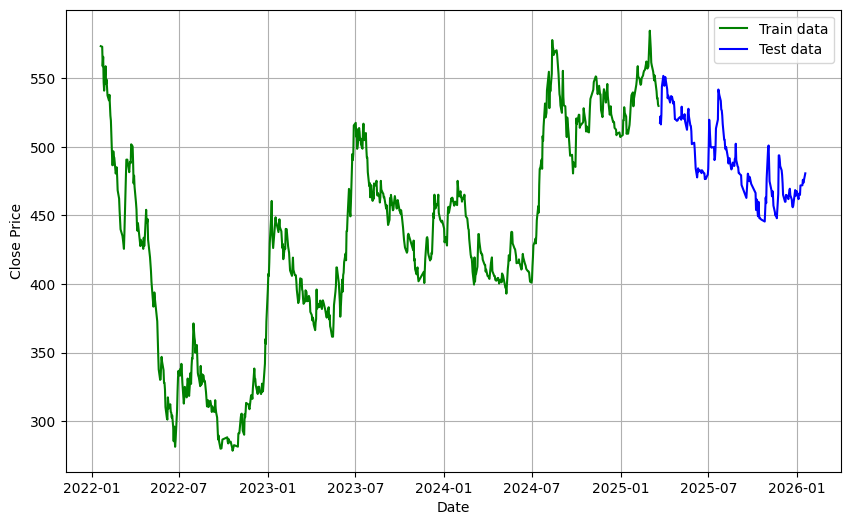

In [292]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(df[0:to_row]['Close'],'green',label='Train data')
plt.plot(df[to_row:]['Close'],'blue',label='Test data')
plt.legend()
plt.show()

In [293]:
model_predictions=[]
n_test_obser = len(testing_data)

In [294]:
from statsmodels.tsa.arima.model import ARIMA
model_predictions = []
n_test_obser = len(testing_data)

for i in range(n_test_obser):
    model = ARIMA(training_data, order=(0,1,1))
    model_fit = model.fit()

    output = model_fit.forecast(steps=1)
    yhat = output[0]

    model_predictions.append(yhat)
    training_data.append(testing_data[i])



In [295]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  924
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3212.409
Date:                Tue, 20 Jan 2026   AIC                           6428.817
Time:                        16:31:16   BIC                           6438.472
Sample:                             0   HQIC                          6432.501
                                - 924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0889      0.028      3.203      0.001       0.035       0.143
sigma2        61.7365      2.001     30.849      0.000      57.814      65.659
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [296]:
print(type(model_predictions))
print(np.array(model_predictions).shape)
print(model_predictions)


<class 'list'>
(185,)
[np.float64(529.8001765968826), np.float64(516.6376024380252), np.float64(522.6766618746948), np.float64(515.8598382639993), np.float64(524.1504564364515), np.float64(545.3781366808943), np.float64(552.2597465529444), np.float64(543.8758355198584), np.float64(547.1390928648542), np.float64(551.2013937473217), np.float64(541.2313638419039), np.float64(534.924663019707), np.float64(537.5843545285306), np.float64(536.2039972350915), np.float64(531.9639054047763), np.float64(537.3958243775749), np.float64(535.9386677351239), np.float64(536.5572757269928), np.float64(530.843714180029), np.float64(533.0153219698191), np.float64(526.7655700604294), np.float64(519.6339731497353), np.float64(520.3226825386756), np.float64(518.8904017435641), np.float64(519.1281943443181), np.float64(519.5741217836547), np.float64(520.6525252404473), np.float64(521.949257965536), np.float64(520.5315168373979), np.float64(519.7068859363254), np.float64(530.0722108440904), np.float64(521.0116

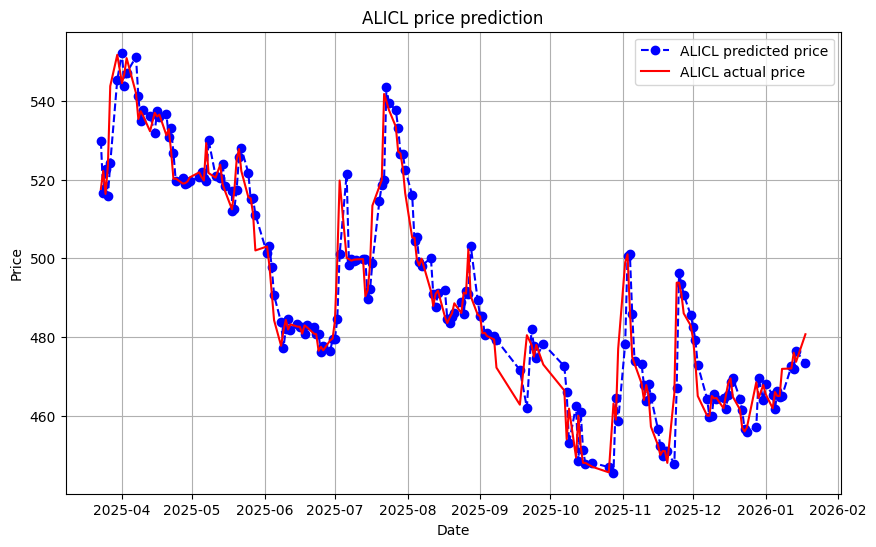

In [297]:
plt.figure(figsize=(10,6))
plt.grid(True)

date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue',marker='o',linestyle='dashed',label='ALICL predicted price')
plt.plot(date_range, testing_data,color='red',label='ALICL actual price')

plt.title('ALICL price prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [298]:
mape= np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.array(testing_data))
print('Mape:'+str(mape))

Mape:0.009789919995578482


In [299]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(testing_data, model_predictions))
print("RMSE:", rmse)


RMSE: 6.91513840962958


In [300]:
# Import libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


final_model = ARIMA(df['Close'], order=(0,1,1))
final_model_fit = final_model.fit()

# --- Forecast next 5 days with confidence intervals ---
forecast = final_model_fit.get_forecast(steps=5)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()



# --- Create future dates starting after last date in df ---
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=5, freq='D')

# --- Interactive plot with plotly ---
fig = go.Figure()

# Historical data
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Historical'
))

# Forecast
fig.add_trace(go.Scatter(
    x=future_dates,
    y=mean_forecast.values,
    mode='lines+markers',
    name='Forecast',
    line=dict(color='red', dash='dash')
))

# Confidence interval
fig.add_trace(go.Scatter(
    x=list(future_dates) + list(future_dates[::-1]),
    y=list(conf_int.iloc[:,0]) + list(conf_int.iloc[:,1][::-1]),
    fill='toself',
    fillcolor='rgba(255,182,193,0.3)',  # light pink
    line=dict(color='rgba(255,182,193,0)'),
    hoverinfo="skip",
    showlegend=True,
    name='95% CI'
))

fig.update_layout(
    title='Stock Price Forecast with 95% Confidence Interval',
    xaxis_title='Date',
    yaxis_title='Close Price',
    template='plotly_white'
)

fig.show()

# --- Print next day prediction safely ---
print("Next trading day prediction:", float(mean_forecast.iloc[0]))


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

Next trading day prediction: 481.3405069488822


In [301]:
print(forecast)


In [302]:
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Suppose df['Close'] has your stock prices
# Example: df = pd.read_csv("NTC.csv", parse_dates=['Date'], index_col='Date')

# --- Step 1: Use auto_arima to find best p,d,q ---
auto_model = pm.auto_arima(
    df['Close'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=None,               # if None, automatically test for differencing
    seasonal=False,       # change to True if you suspect seasonality
    stepwise=True,        # faster search
    suppress_warnings=True,
    trace=True            # prints search progress
)

print("Best ARIMA order:", auto_model.order)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6442.612, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6437.541, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6437.501, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6440.761, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6439.541, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6439.470, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6438.835, Time=0.44 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=6435.626, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=6437.665, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=6437.597, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6435.665, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=6436.964, Time=0.19 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.622 seconds
Best ARIMA order: (0, 1, 1)


In [303]:
import pickle
with open("arima_model_historical_nabil.pkl", "wb") as f:
    pickle.dump(final_model_fit, f)

print("Model saved as arima_model.pkl")


Model saved as arima_model.pkl
